# R Cheatsheet

In [138]:
library(tidyverse)

## Mathematical functions

In [21]:
x <- 1
n <- 2

invisible(c(
    
log(x),       # base e of log x
exp(x),       # anti-log of x
log(x,n),     # base n of log x
log10(x),     # base 10 of log x
sqrt(x),      # square root of x
factorial(x), # x!
choose(n,x),  # binomial coefficient: n!/(x!(n-x)!)
abs(x),       # absolute value
floor(x),     # greater integer less than x
ceiling(x),   # smallest integer greter than x
# Trigonometric functions
cos(x),
sin(x),
tan(x),
asin(x),
acos(x),
atan(x),
asinh(x),
acosh(x),
atanh(x)
))
# + - * / sum subtraction multiplication division
# %/% %% ^ integerquotient modulo power
# > >= < <= == != relational operators
# ! & | NOT AND OR

In [144]:
integrate(function(x) {sin(x)}, lower=min, upper=max) # integrate from min to max the function sin
# add $value to retrieve the value

1.379374 with absolute error < 2.5e-13

## Vectors, Matrices and Data Frames

In [140]:
min    <- 1
max    <- 10
step   <- 1
n.elem <- 100
num    <- 4
num1   <- 3
num2   <- 2

# VECTORS
invisible(c(
min:max,                                     # 1 2 3 4 5 6 7 8 9 10 
seq(min,max,step),                           # 1 2 3 4 5 6 7 8 9 10 
seq(from=min,to=max,length=n.elem),          # creates a vector of n.elem elements evenly separated
rep(num, n.elem),                            # creates a vector repeating num n.elem times
rep(min:max, n.elem),                        # 1 2 3 4 5 6 7 8 9 10 X n.elem
rep(min:max, n.elem, each=num1, times=num2), # (1 X num1 2 X num1 ... ) X num2
rep(min:max, min:max),                       # 1 2 2 3 3 3 4 4 4 ...


(min:max)[-1],    # Removes the first element 2 3 4 5 ...
(min:max)[-1:-4], # Removes the first 4 elements
(min:max)[-length(min:max)] # Removes the last element
))

# MATRICES
# create a vector
v1 <- c(1:20) # 1 2 3 4 ...

# 1 transform the vector to a matrix by changing its dimension
dim(v1) <- c(4,5) # 1  5  9  13 17
                  # 2  6  10 14 18
                  # ...

# 2 by using matrix()
v1 <- c(1:20) # 1 2 3 4 ...
m1 <- matrix(v1, nrow=4, ncol=5)

v2 <- c(20:1)
# VECTORS AND MATRICES FUNCTIONS
invisible(c(
max(v1),
min(v1),
sum(v1),
mean(v1),
median(v1),
range(v1),    # vector with min(v1) and max(v1)
var(v1),
cor(v1,v2),   # correlation between v1 and v2
sort(v2),     # sorted version of v2, sort(v2) = v1
length(v1),
cumsum(v1),
cumprod(v1),
colMeans(m1), # column means of matrix
colSums(m1),  # column sums of matrix
rowMeans(m1), # row ""
rowSums(m1)   # row ""
))

# ADDING ROWS AND COLUMNS TO A MATRIX
v3 <- c(1:2,4:5)
m2 <- matrix(v3, c(2,2)) # 1 4
                         # 2 5

m2 <- rbind(m2, c(3,6))  # 1 4
                         # 2 5
                         # 3 6

m2 <- cbind(m2, c(7,8,9)) # 1 4 7
                          # 2 5 8
                          # 3 6 9

# APPLY FUNCTIONS to apply operations on multiple objects of a complex structure (vector, matrix,...)
# apply(X, MARGIN, FUNCTION)
# X: array or matrix
# MARGIN: can be
#         1 manipulation performed on rows
#         2 manipulation performed on columns
# FUNCTION: mean, median, sum,... and user-defined ones
ap1 <- apply(m2, 1, sum)  # 12, 15, 18
ap2 <- apply(m2, 2, mean) # 2,   5,  8

# DATAFRAMES
d1 <- data.frame(colname1 = v1, colname2 = v2)
# Useful commands
invisible(c(
d1[num1,], # select all of the columns from row num1 of the data frame
d1[-num1,] # removes ""
# you can mix that with vector indices
))

# TIBBLES require tidyverse
d1 <- tibble(d1)
d2 <- filter(d1, colname2>10) # you can filter according to one of the two colums

### Dealing with NAs

In [49]:
invisible(c(
vec <- c(NA, 1, NA, 'cat'),
is.na(vec),       # TRUE FALSE TRUE FALSE

vec[! is.na(vec)] # REMOVES ALL NA
))

## Working with files

In [96]:
string <- 'Hi!'

# Write a string to a file
writeLines(string, con='file1.txt')
# Read from files
string2 <- read.delim('file1.txt')

# Write data to csv
write.csv(d1, file = "data1.csv")
# Read from csv file
d2 <- read.csv('data1.csv')

## Random numbers

In [127]:
set.seed(123456) # Sets a seed

invisible(c(
# Sample from a vector
sample(v1,1), # Sample randomly a number from v1
sample(v1,10), # Sample randomly 10 numbers from v1 NO REPLACEMENTS
sample(v1,10, replace=T), # Sample randomly 10 numbers from v1 WITH REPLACEMENTS

# From a distribution
runif(num,min,max),             # Samples num floats uniformly between min and max
rnorm(n=num, mean = num1, num2) # Samples num floats normally with mean num1 and std num2
))

## Graphics

In [238]:
options(repr.plot.width=5, repr.plot.height=5)

<img src="https://www.statmethods.net/advgraphs/images/points.png"  width="400"/>
<img src="https://www.statmethods.net/advgraphs/images/lines.png"  width="400"/>
<img src="https://www.statmethods.net/advgraphs/images/colorchart.png"  width="400"/>


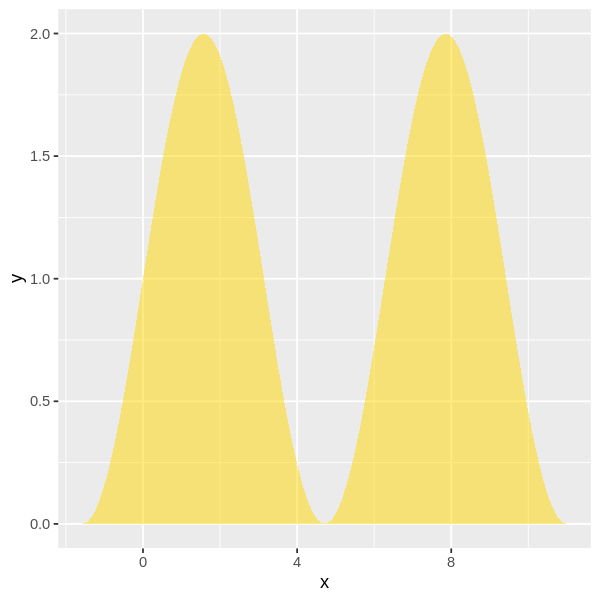

In [248]:
# Plots the function and the area below it (or above), ideal for probability distributions
# col: color
graphics.areafunc <- function(func, x, col)
    {
        df = data.frame(x=x,y=func(x))
        df %>% ggplot(aes(x=x, y=y)) +
        geom_ribbon(data=df,aes(ymax=y),ymin=0,
                      fill=col,colour=NA,alpha=0.5)
    }

x <-seq(-pi/2,7*pi/2,length=100)
fun <- function(x){return(1+sin(x))}
graphics.areafunc(fun,x,'gold')

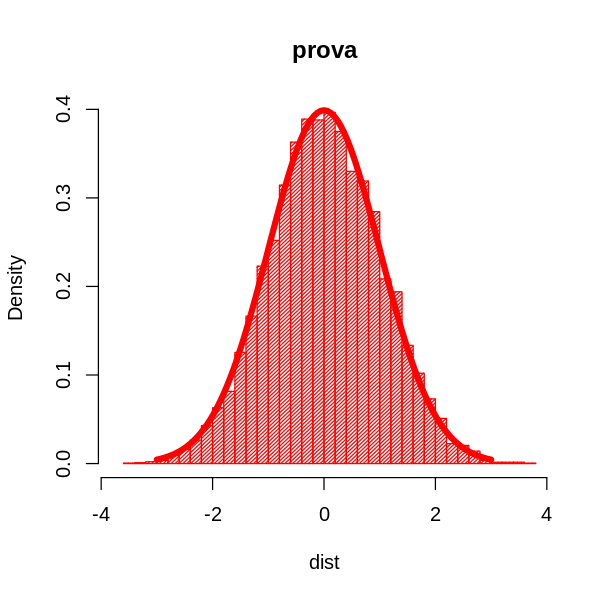

In [241]:
graphics.histandcurve <- function(dist, fun, col, xmin, xmax, breaks, title)
    {
        x <- seq(xmin,xmax, by = 1/(xmax - xmin))
        hist(dist,xlim=c(xmin -.75, xmax + .75),col=col, density = 30, main=title, 
             breaks = breaks, probability = TRUE)
        curve(fun(x), from=xmin, to=xmax, , xlab="x", ylab="y", col=col, lwd = 5, add = TRUE)
    }

dist <- rnorm(n=10000, mean = 0, 1) 
graphics.histandcurve(dist, dnorm, 'red', -3, 3, 50, 'prova')

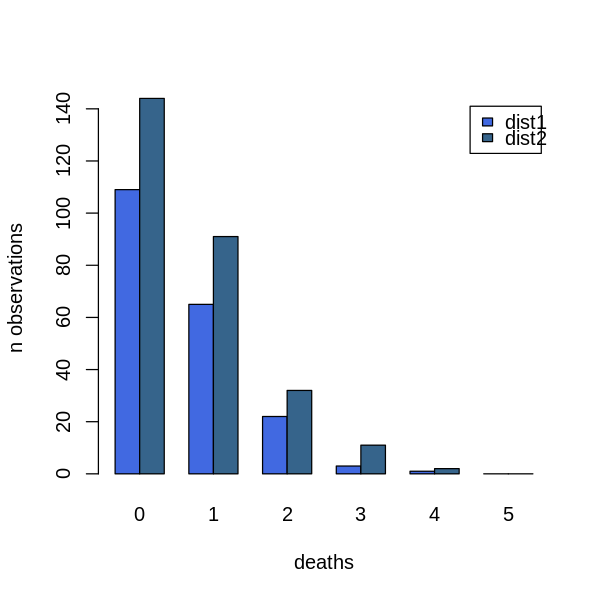

In [300]:
graphics.2barplots <- function(dist1,dist2,x)
    {
        n1.col <- 'royalblue'
        n2.col <- 'steelblue4'
        ns <- rbind(dist1,dist2)
        barplot(ns,beside=T,names.arg=x,col=c(n1.col,n2.col),
                ylab='n observations', xlab='deaths',legend=TRUE)
    }

n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)
graphics.2barplots(n1,n2,seq(0,5,1))

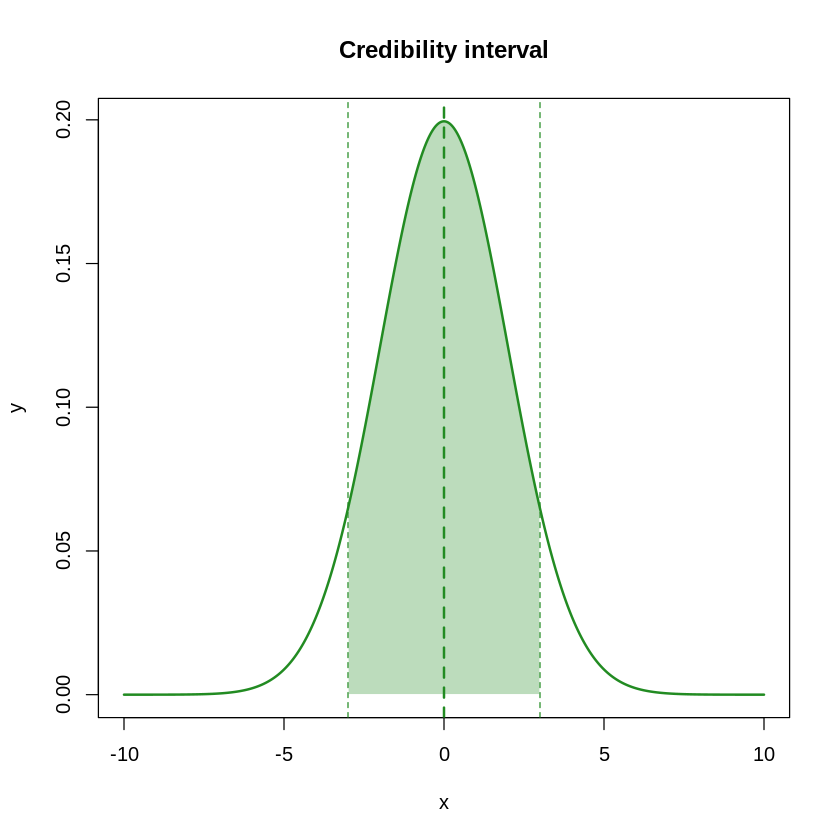

In [2]:
grafichs.printcredibilityinterval <- function(x,y,est,cred,xlim,col)
    {
        plot(x,y,pch='',xlim=xlim, main = 'Credibility interval')
    
        i <- 1
        j <- 1
        
        while(x[j] < cred[2])
            {
                if(x[i] < cred[1])
                    {
                        i <- i + 1
                    }
            
                j <- j + 1
            }
        k <- i
        yp <- c(0)
        while(k<=j)
            {
                yp <- c(yp,y[k])
                k <- k + 1
            }
        yp <- c(yp, 0)
        xp <- c(cred[1], seq(x[i], x[j], x[2]-x[1]), cred[2])
    
        polygon(x = xp, y = yp, col = adjustcolor(col,alpha.f=0.3), border = 0)
        lines(x,y,col=col,lwd=2)
        abline(v=est,lwd=2,col=col,lty=2)
        abline(v=cred[1],lwd=1,col=col,lty=2)
        abline(v=cred[2],lwd=1,col=col,lty=2)
    }


x <- seq(-10,10,0.01)
y <- dnorm(x,mean=0,sd=2)
est <- 0

grafichs.printcredibilityinterval(x,y,est,c(-3,3),c(-10,10),'forestgreen')

## Bayesian inference

In [ ]:
bayes.computeposterior <- function(likelihood, prior)
    {
        n.sample <- 2000
        delta.p  <- 1/n.sample
        p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
        
        likelihoodvec <- likelihood(p)
        priorvec <- prior(p)
    
        normalization <- delta.p * sum(likelihoodvec*priorvec)
        posterior <- likelihoodvec*priorvec/normalization
    
        return(posterior)
    }

In [ ]:
bayes.getcredibilityinterval <- function(dist,conf,delta.p)
    {
        indx <- match(max(dist),dist)
        area <- max(dist)*delta.p
        
        i <- 1
        j <- 1
        while(area < conf)
            {
                if (indx - j > 0 )
                    {
                        area <- area + ( dist[indx+i] + dist[indx-j] ) * delta.p
                        i <- i + 1
                        j <- j + 1
                    }
                # This may solve some problems for distribution where the max is close to 0
                else
                    {
                        area <- area + ( dist[indx+i] ) * delta.p
                        i <- i + 1
                    }
            }
    
        return( c( p[indx-j] , p[indx+i] ) ) 
    }

In [3]:
bayes.numericalmedian <- function(dist,step)
    {
        area <- 0
        pos  <- 0
        while(area < 0.5)
            {
                pos  <- pos + 1 
                area <- area + step*dist[pos]
            }
        return(pos*step)
    }

bayes.numericalmean <- function(dist,x)
    { 
        return( sum(dist*x))
    }

bayes.numericalvariance <- function(dist,x)
    { 
        return(sum( dist*(x-bayes.numericalmean(dist,x))^2 ))
    }

bayes.numericalmode <- function(dist,step)
    {
        indx <- match(max(dist),dist)
        return (step*indx)
    }

bayes.normalinference.normalprior.knownsig <- function(data, priorsig, priorm, knownsig)
    {
        y.bar <- mean(data)
        n <- length(data)
        m <- priorm
        s <- priorsig
        sigma <- knownsig
    
        mu.post <- m*((1/s^2)/((n/sigma^2) + (1/s^2))) + y *((n/sigma^2))/((n/sigma^2)+ (1/s^2))
        sd.sq.post <- ((sigma^2)*(s^2))/(sigma^2 + n*s^2)
    
        return(c(mu.post, sqrt(sd.sq.post)))
    }

bayesian.printacceptreject <- function(level,result)
    {
        if(result < level)
            {
                cat('Since', round(result,5), 'is less than', level, 'we reject the hypothesis')
            }
        else
            {
                cat('Since', round(result,5), 'is greater than', level, 'we cannot reject the hypothesis')
            }
    }

## Sampling from a distribution

### Markov Chains, Gibbs sampling and so on

In [1]:
# Parameters:
#            func: a function whose first argument is a real vector of parameters
#                  func returns a log10 of the likelihood function
#            theta.init: the initial value of the Markov Chain (and of func)
#            n.sample: number of required samples
#            sigma: standard deviation of the gaussian MCMC sampling pdf

metropolis.1dim <- function(func, theta.init, n.sample, sigma)
    {
        theta.cur <- theta.init        # current x value
        func.cur  <- func(theta.cur)   # current Log10(f(x)) value
    
        # We will return this matrix, it contains all the steps
        func.samp <- matrix(data=NA, nrow=n.sample, ncol=2)
        
        n.accept    <- 0
        rate.accept <- 0.0
    
        for(n in 1:n.sample)
            {
                # we pick a proposal sampling once from a gaussian distribution with mean theta.curr and
                # sigma as the sigma parameter
                theta.prop <- rnorm(n=1, mean = theta.cur, sigma)
                func.prop  <- func(theta.prop)
            
                # log10(Pprop/Pcurr) -> Log(Pprop) - Log(Pcurr)
                logMR <- func.prop - func.cur # Log10 of the metropolis ratio
                
                # We accept if
                # -> logMR > Log10(1) = 0
                # -> Log10(runif(1)) < logMR (accept reject)
                if( logMR>=0 || logMR>log10(runif(1)) )
                    {
                        # accept
                        theta.cur <- theta.prop
                        func.cur  <- func.prop
                        n.accept  <- n.accept + 1
                    }
                
                # Now we update our matrix with the n-th step:
                func.samp[n, 1] <- func.cur
                func.samp[n, 2] <- theta.cur
            }
    
        return(func.samp)
    }

In [3]:
#  This should work for every dim

# Parameters:
#            func: a function whose first argument is a real vector of parameters
#                  func returns a log10 of the likelihood function
#            theta.init: the initial value of the Markov Chain (and of func)
#            n.sample: number of required samples
#            sample.cov: standard deviations of the gaussian MCMC sampling pdf
metropolis.ndim <- function(func, theta.init, n.burnin, n.sample, sample.cov)
    {
        n.theta   <- length(theta.init)
    
        theta.cur <- theta.init
        func.cur  <- func(theta.init) # log10
        
        # We will return this matrix, it contains all the steps
        func.samp <- matrix(data=NA, nrow=n.sample, ncol=2+n.theta) 

        n.accept    <- 0
        rate.accept <- 0.0
  
        for(n in 1:(n.burnin+n.sample))
            {

                # Metropolis algorithm. No Hastings factor for symmetric proposal
                if(is.null(dim(sample.cov)))
                    { 
                        # theta and sampleCov are scalars
                        theta.prop <- rnorm(n=1, mean=thetaCur, sd=sqrt(sampleCov))
                    }
                else
                    {
                        theta.prop <- rmvnorm(n=1, mean=theta.cur, sigma=sample.cov, method="eigen")
                    }

                func.prop  <- func(theta.prop) 
            
                # log10(Pprop/Pcurr) -> Log(Pprop) - Log(Pcurr)
                logMR <- sum(func.prop) - sum(func.cur) # log10 of the Metropolis ratio
                
                # We accept if
                # -> logMR > Log10(1) = 0
                # -> Log10(runif(1)) < logMR (accept reject)
                if(logMR>=0 || logMR>log10(runif(1)))
                    {
                        theta.cur   <- theta.prop
                        func.cur    <- func.prop
                        n.accept    <- n.accept + 1
                        rate.accept <- n.accept/n
                    }
            
                if(n>n.burnin)
                    {
                        func.samp[n-n.burnin,1:2] <- func.cur
                        func.samp[n-n.burnin,3:(2+n.theta)] <- theta.cur
                    }

            }

        return(func.samp)
    }

In [2]:
metropolis.plotiter <- function(chain,dim)
    {
        bestparams <- c()
        # 10^(allSamp[,1]+allSamp[,2]) is the unnormalized posterior at each sample
        #thinning
        thinSel  <- seq(from=1, to=nrow(chain), by=200) # thin by factor 100
        postSamp <- chain[thinSel,]

        # Plot MCMC chains 
        par(mfrow=c(4,2), mar=c(3.0,3.5,0.5,0.5), oma=0.5*c(1,1,1,1), mgp=c(1.8,0.6,0), cex=0.9)

        parnames <- c(expression(b[0]), expression(paste(alpha, " / rad")), expression(b[2]), 
                      expression(paste(log, " ", sigma)))

        for(j in 3:dim+3) 
            { # columns of postSamp
                plot(1:nrow(postSamp), postSamp[,j], type="l", xlab="iteration", ylab=parnames[j-2])
                postDen <- density(postSamp[,j], n=2^10)
                bestparams <- c(bestparams,(postDen$x[match(max(postDen$y),postDen$y)]))
                plot(postDen$x, postDen$y, type="l", lwd=1.5, yaxs="i", ylim=1.05*c(0,max(postDen$y)),
                     xlab=parnames[j-2], ylab="density")
                abline(v=bestparams[j-2],col='red')

            }
        return(bestparams)
    }